In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline
import numpy as np
import json 
import requests
import urllib3
from urllib3 import request
import matplotlib.pyplot as plt
import hvplot.pandas



In [2]:
api_result = requests.get('http://api.marketstack.com/v1/dividends?access_key=d4dae97b992f9679cb6e46d027601db2&symbols=T,PFE,ABBV,XOM,GILD,INTC,ET,VZ,IBM,JPM,CVX,EPD,MO,UPS,MMM,C,KMI,MRK,BX,LUMN,BP,WBA,O,NRZ,NLY,AMGN,FTR,AGNC,VALE,ENB,RDS.A,KHC,VLO,DOW,PSEC,PM,DUK,DVN,MS,IIPR,RIO,PBR,GSK,SO,OHI,OKE,PRU,SPG,NEM,UTX,BKR,VTV,VYM,IWD,SCHD,RSP,IVE,DGRO,SPLG,SPYV,FVD&date_from=2017-01-01&date_to=2021-12-31&limit=1000&offset=0').json()
api_result 

{'pagination': {'limit': 1000, 'offset': 0, 'count': 1000, 'total': 1196},
 'data': [{'date': '2021-11-29', 'dividend': 0.7, 'symbol': 'DOW'},
  {'date': '2021-11-12', 'dividend': 0.66, 'symbol': 'SO'},
  {'date': '2021-11-04', 'dividend': 0.3475, 'symbol': 'INTC'},
  {'date': '2021-11-04', 'dividend': 0.39, 'symbol': 'PFE'},
  {'date': '2021-11-01', 'dividend': 0.236, 'symbol': 'O'},
  {'date': '2021-10-28', 'dividend': 0.12, 'symbol': 'AGNC'},
  {'date': '2021-10-28', 'dividend': 0.45, 'symbol': 'EPD'},
  {'date': '2021-10-28', 'dividend': 0.7, 'symbol': 'MS'},
  {'date': '2021-10-26', 'dividend': 0.06, 'symbol': 'PSEC'},
  {'date': '2021-10-14', 'dividend': 1.3, 'symbol': 'ABBV'},
  {'date': '2021-10-07', 'dividend': 0.52, 'symbol': 'T'},
  {'date': '2021-10-07', 'dividend': 0.64, 'symbol': 'VZ'},
  {'date': '2021-10-05', 'dividend': 1.0, 'symbol': 'JPM'},
  {'date': '2021-10-01', 'dividend': 0.25, 'symbol': 'NRZ'},
  {'date': '2021-09-30', 'dividend': 0.24, 'symbol': 'O'},
  {'date

In [3]:
#print(json.dumps(api_result, indent=2, sort_keys=True))


In [4]:
#dividend_index_data = 

dividend_index_df = pd.DataFrame(api_result['data'])
dividend_index_df = dividend_index_df.sort_values('date', ascending=True)

    
            

In [5]:
#oke_df = dividend_index_df.loc[(df['OKE'].isin(['symbol'])
oke_filter = (dividend_index_df["symbol"]=="OKE")
oke_filter

999    False
998    False
996    False
997    False
994    False
       ...  
4      False
3      False
2      False
1      False
0      False
Name: symbol, Length: 1000, dtype: bool

In [6]:
oke_df = dividend_index_df[oke_filter] 

In [7]:
oke_df

date  dividend symbol
947  2018-01-26      0.77    OKE
884  2018-04-27      0.80    OKE
814  2018-08-03      0.83    OKE
752  2018-11-02      0.86    OKE
698  2019-01-25      0.86    OKE
636  2019-04-26      0.87    OKE
563  2019-08-05      0.89    OKE
504  2019-11-01      0.92    OKE
448  2020-01-24      0.94    OKE
386  2020-04-24      0.94    OKE
318  2020-07-31      0.94    OKE
256  2020-10-30      0.94    OKE
194  2021-01-29      0.94    OKE
135  2021-04-23      0.94    OKE
67   2021-07-30      0.94    OKE

<AxesSubplot:xlabel='date'>

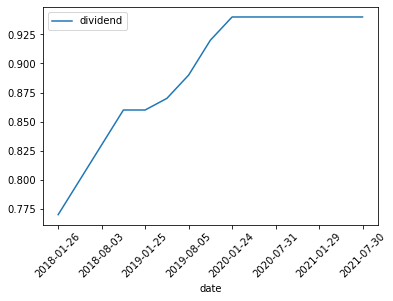

In [8]:
oke_df.set_index('date').plot(rot=45)

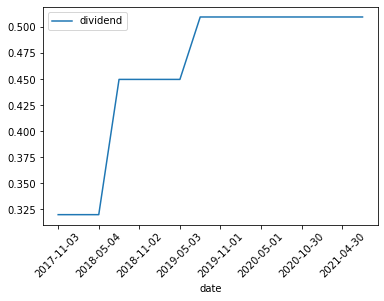

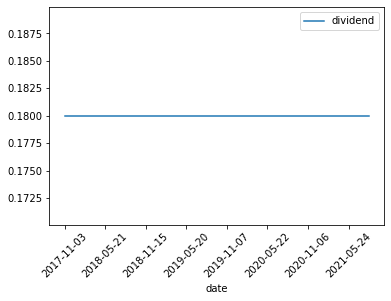

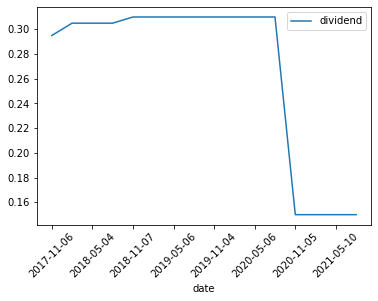

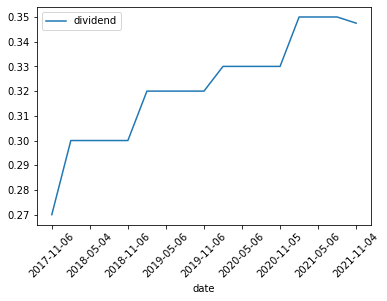

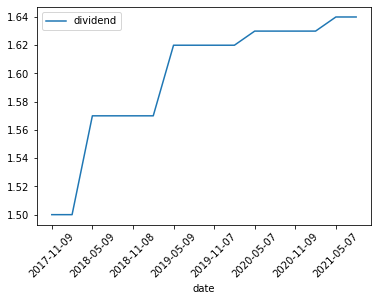

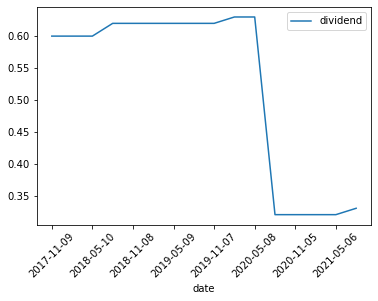

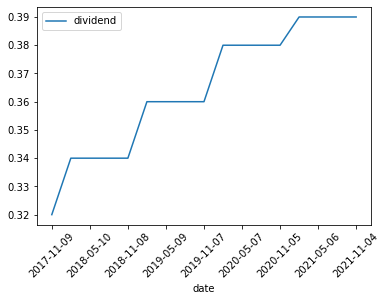

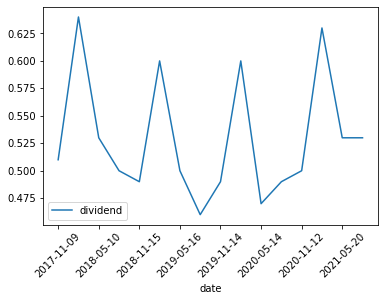

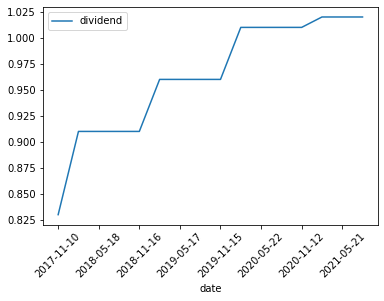

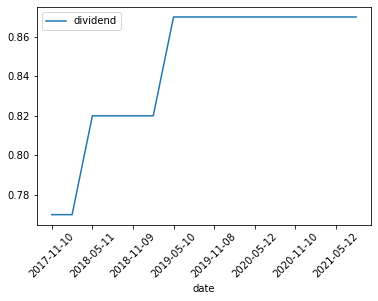

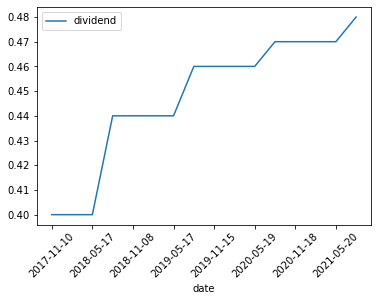

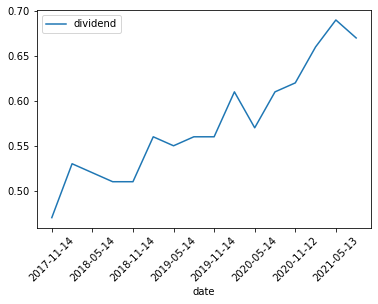

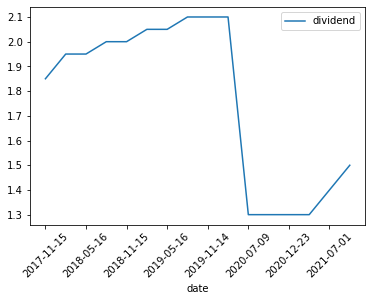

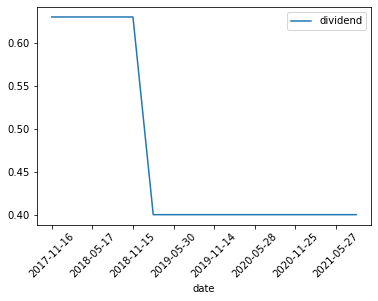

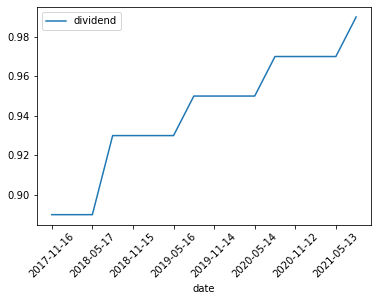

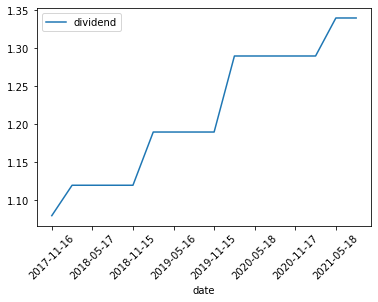

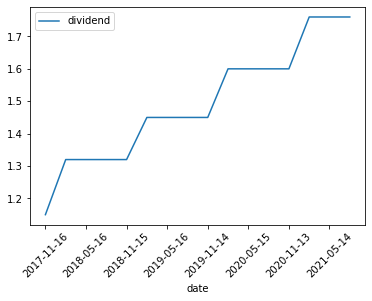

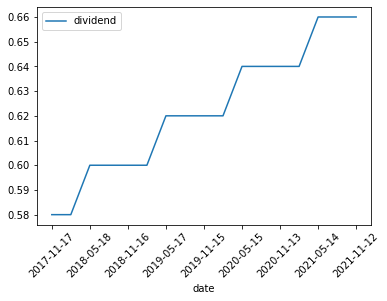

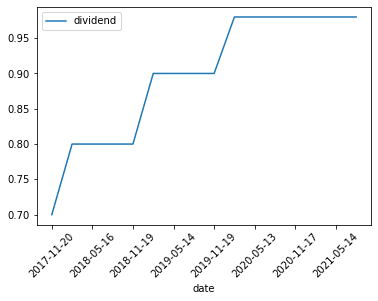

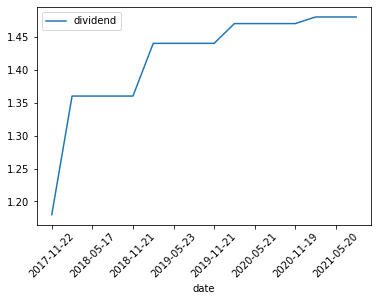

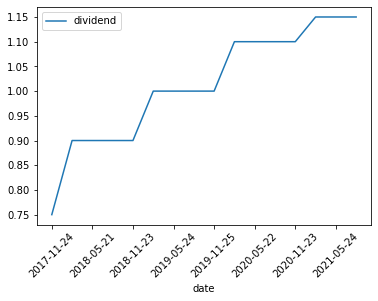

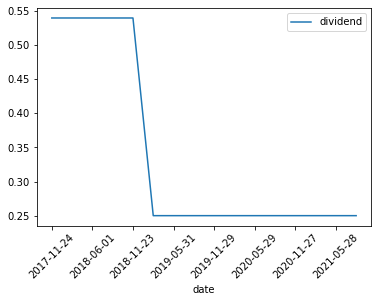

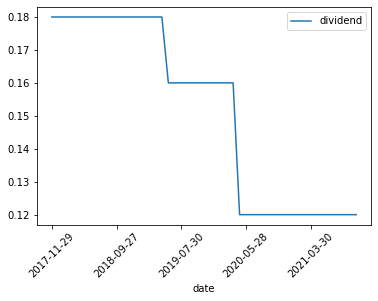

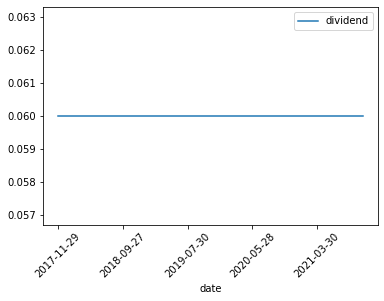

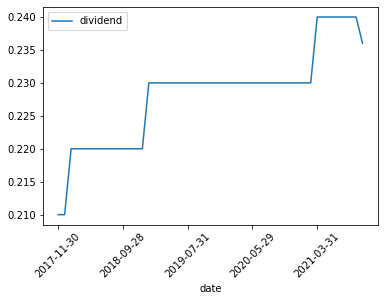

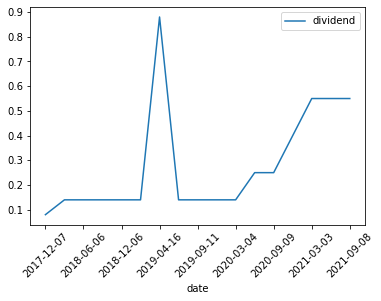

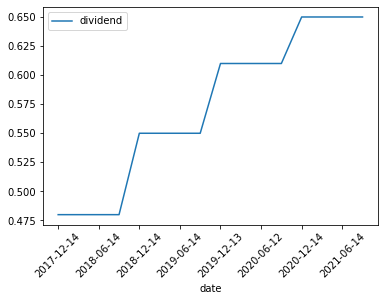

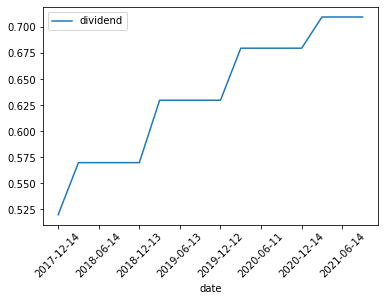

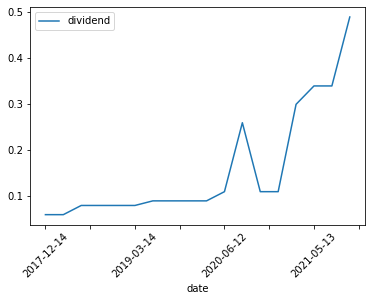

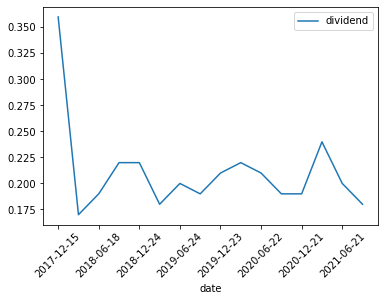

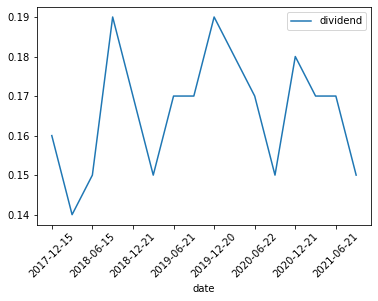

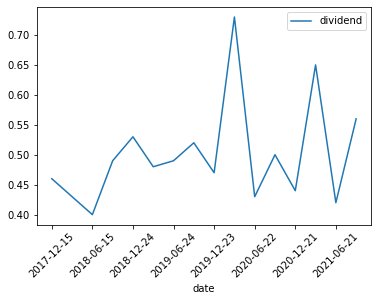

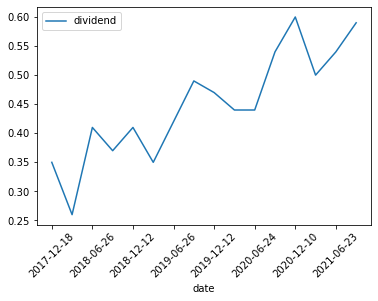

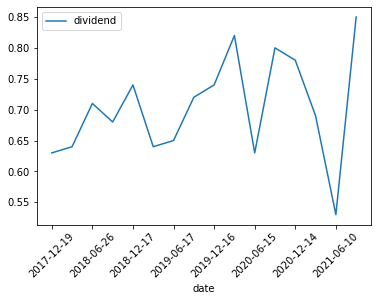

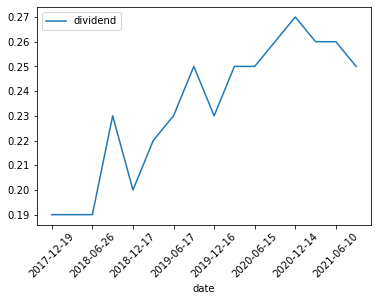

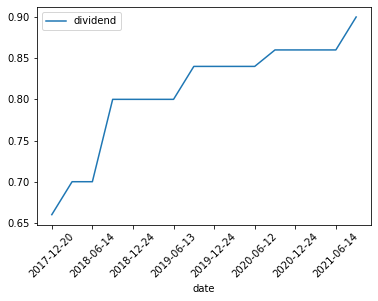

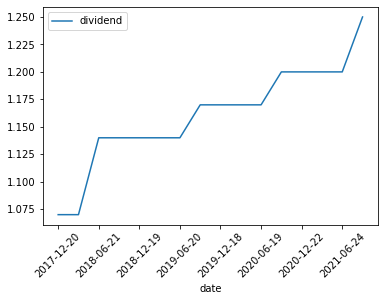

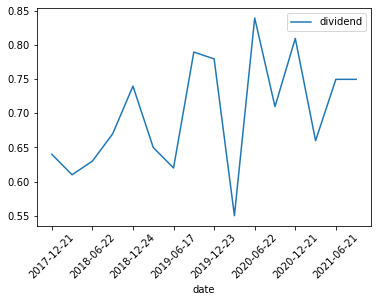

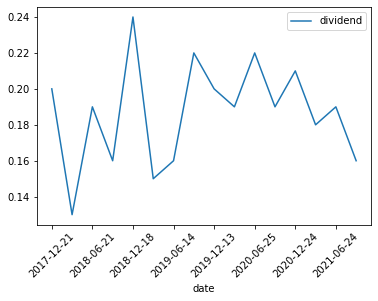

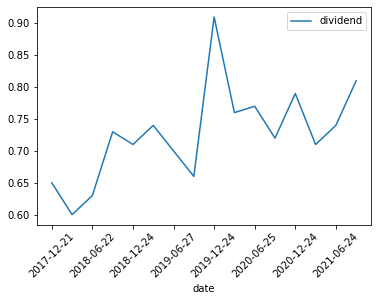

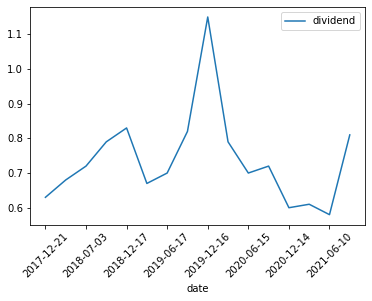

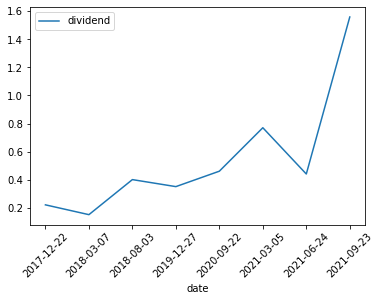

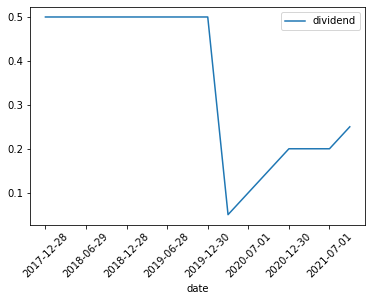

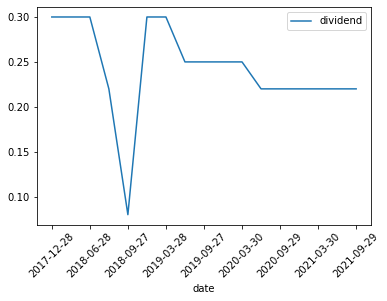

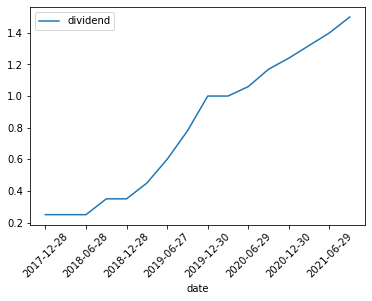

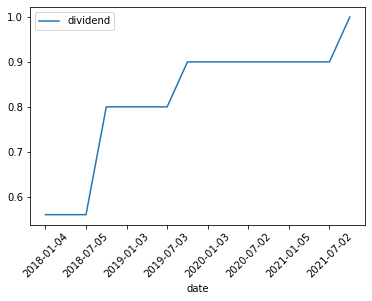

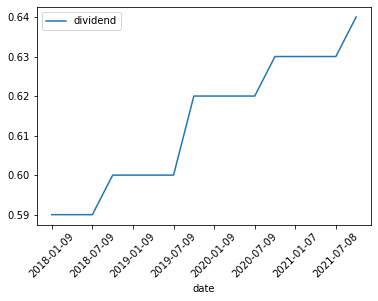

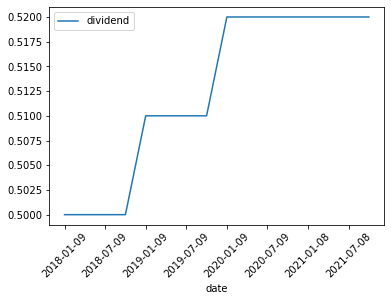

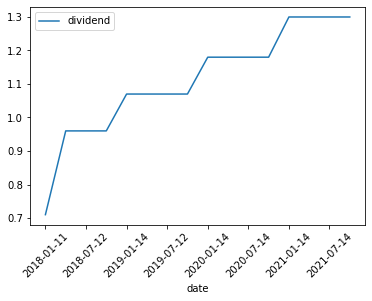

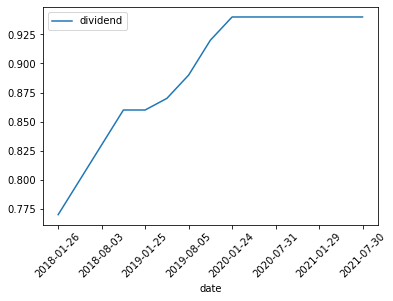

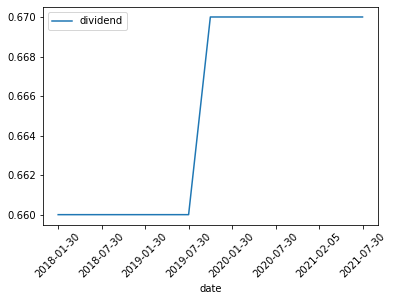

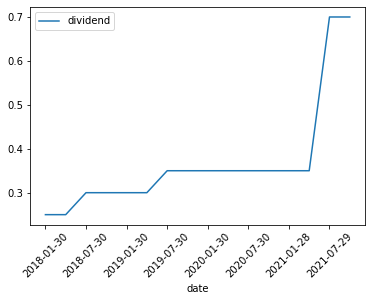

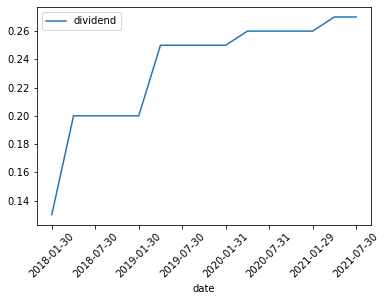

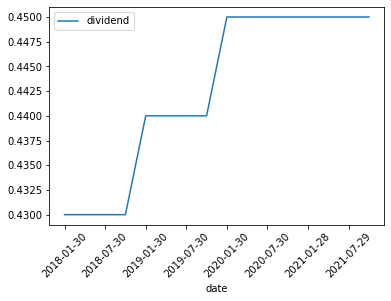

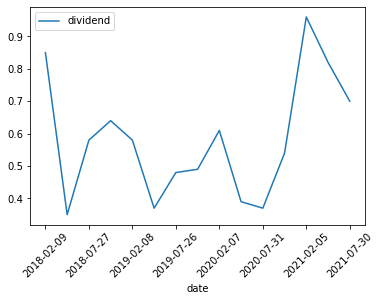

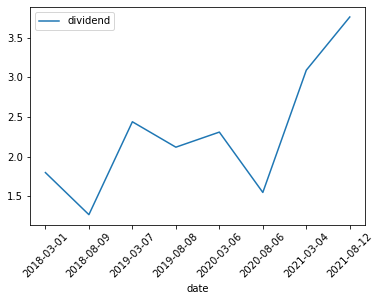

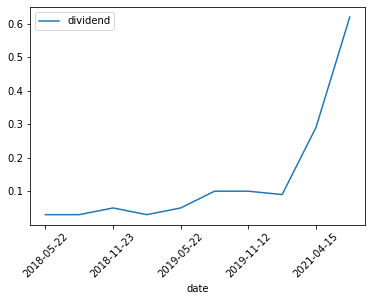

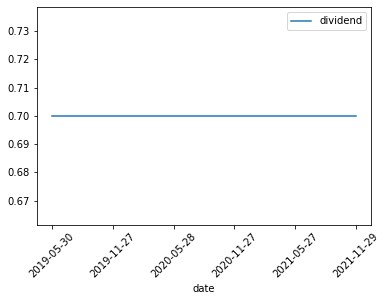

In [9]:
for symbol in dividend_index_df.symbol.unique():
    symbol_filter = (dividend_index_df["symbol"]== symbol)
    symbol_df = dividend_index_df[symbol_filter] 
    symbol_df.set_index('date').plot(rot=45)
    plt.show()

In [14]:
dividend_index_df.hvplot(y="dividend", x='date', groupby="symbol", rot=45)

:DynamicMap   [symbol]
   :Curve   [date]   (dividend)